# Weather Data Exploration

1. Load, clean and explore the data. This work should be completed in python. 
2. Create some visualizations (at least 3, no more than 10), with optional statistical analysis, to explore some aspect of the data that interests you. You may create visualizations in python with matplotlib or other libraries, with Tableau or some other visualization software. 
3. Complete a brief write up describing your code and your analysis. 


In [206]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import calmap

%matplotlib inline

In [121]:
df = pd.read_csv(os.getcwd() + "/us-weather-history/KMDW.csv")
df["date"] = pd.to_datetime(df["date"])
df.describe()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,364.000000,364.000000,365.000000,365.000000,365.000000
mean,51.049315,42.882192,58.712329,43.539726,59.471233,21.191781,83.183562,1959.662088,1968.912088,0.098740,0.107096,1.674630
std,20.352735,19.739925,21.427029,17.299136,18.807071,23.142332,15.615284,22.896788,25.888040,0.323879,0.025329,0.919481
min,1.000000,-7.000000,7.000000,18.000000,31.000000,-25.000000,51.000000,1873.000000,1928.000000,0.000000,0.050000,0.340000
25%,35.000000,30.000000,39.000000,27.000000,41.000000,-1.000000,69.000000,1940.000000,1947.000000,0.000000,0.090000,1.080000
50%,53.000000,44.000000,62.000000,44.000000,61.000000,26.000000,87.000000,1958.000000,1970.000000,0.000000,0.110000,1.410000
75%,70.000000,60.000000,79.000000,60.000000,78.000000,44.000000,97.000000,1979.250000,1990.000000,0.040000,0.130000,2.050000
max,83.000000,74.000000,94.000000,68.000000,85.000000,58.000000,109.000000,2015.000000,2014.000000,3.310000,0.150000,6.160000


In [122]:
print(max(df["date"]), min(df["date"])) # From July 2014 to June 2015

2015-06-30 00:00:00 2014-07-01 00:00:00


### Plot 1: Days with precipitaion vs. Days without precipitation by Month

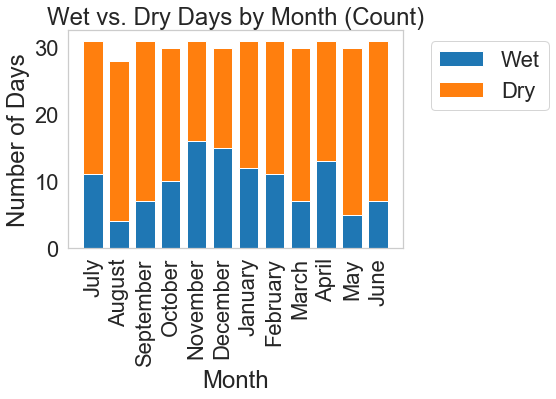

In [242]:
# add col for rainy or not, add col for month, and plot rainy vs. non-rainy days per month
df["rainy"] = df["actual_precipitation"] > 0
df["rainy"] = df["rainy"].astype(int)
df["not_rainy"] = df["actual_precipitation"] == 0
df["not_rainy"] = df["not_rainy"].astype(int)

# create grouped df for plotting using .sum()
df["month"] = pd.DatetimeIndex(df['date']).month
rain_df = df.groupby('month')[["rainy", "not_rainy"]].sum()

months = ["July", "August", "September", "October", "November", 
          "December", "January", "February", "March", "April", "May", "June"]

rainy = rain_df["rainy"]
nonrainy = rain_df["not_rainy"]
ind = np.arange(12)    # the x locations for the groups
width = 0.75       # the width of the bars

p1 = plt.bar(ind, rainy, width)
p2 = plt.bar(ind, nonrainy, width, bottom=rainy)

plt.ylabel('Number of Days')
plt.title('Wet vs. Dry Days by Month (Count)')
plt.xticks(ind, months)
plt.legend((p1[0], p2[0]), ('Wet', 'Dry'), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Month')
plt.xticks(rotation = 90)
    
plt.show()


### Plot 2: Percent of days with precipitation by Month

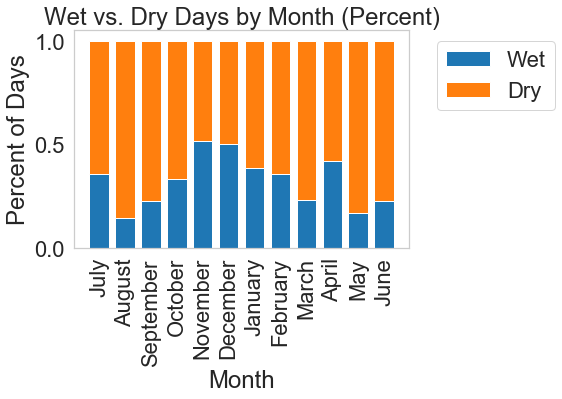

In [241]:
# create grouped df for plotting using .mean()
df["month"] = pd.DatetimeIndex(df['date']).month
rain_df = df.groupby('month')[["rainy", "not_rainy"]].mean()

months = ["July", "August", "September", "October", "November", 
          "December", "January", "February", "March", "April", "May", "June"]

ind = np.arange(12)
rainy = rain_df["rainy"]
nonrainy = rain_df["not_rainy"]
p1 = plt.bar(ind, rainy, width)
p2 = plt.bar(ind, nonrainy, width, bottom=rainy)

plt.ylabel('Percent of Days')
plt.title('Wet vs. Dry Days by Month (Percent)')
plt.xticks(ind, months)
plt.legend((p1[0], p2[0]), ('Wet', 'Dry'), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

### Plot 3: Heatmap of Temperature over the year

Note that there are two plots that are half full. This is because we only have data for half of year for two years.  

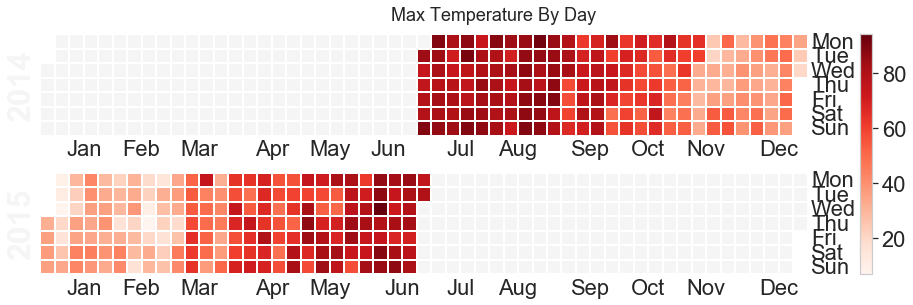

In [240]:
# Make series for heatmap and plot 
s = pd.Series(list(df["actual_max_temp"]), index=df["date"])

fig, ax = calmap.calendarplot(s, fig_kws={"figsize":(15,4)})
fig.suptitle('Max Temperature By Day', y = 1.05, fontsize = 18)  
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())
plt.show()

### Plot 4 and 5:  Years with historic highs
 Sort by year (plot 4) and number of historic highs (plot 5)

In [125]:
len(df["record_max_temp_year"].unique()) # 80 unique years with records
min(df["record_max_temp_year"]) # 1928 was the earliest
max(df["record_max_temp_year"]) # 2014 is the latest
span = max(df["record_max_temp_year"]) - min(df["record_max_temp_year"]) # spans 86 years
span 

86.0

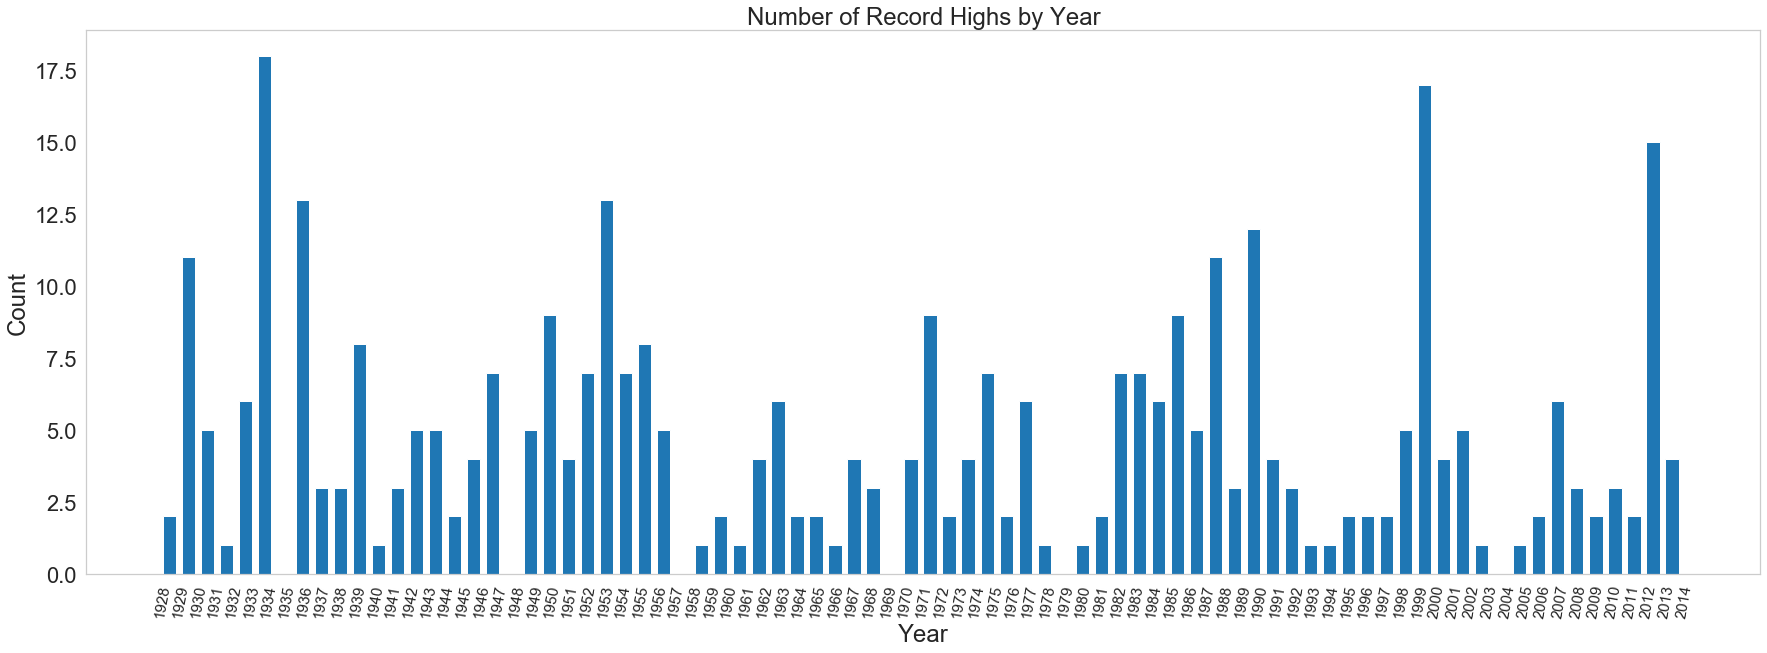

In [204]:
plt.figure(figsize=(30,10))
plt.rcParams["axes.grid"] = False
plt.hist(df["record_max_temp_year"], bins = 80, width=0.75)
plt.ylabel('Count of Record Highs')
plt.title('Number of Record Highs by Year')

# create list of x labels
x_labs = [int(min(df["record_max_temp_year"]) + i) for i in range(int(span)+1)]
plt.xticks(x_labs, fontsize = 15)
plt.xlabel('Year')
plt.xticks(rotation = 80)
plt.show()

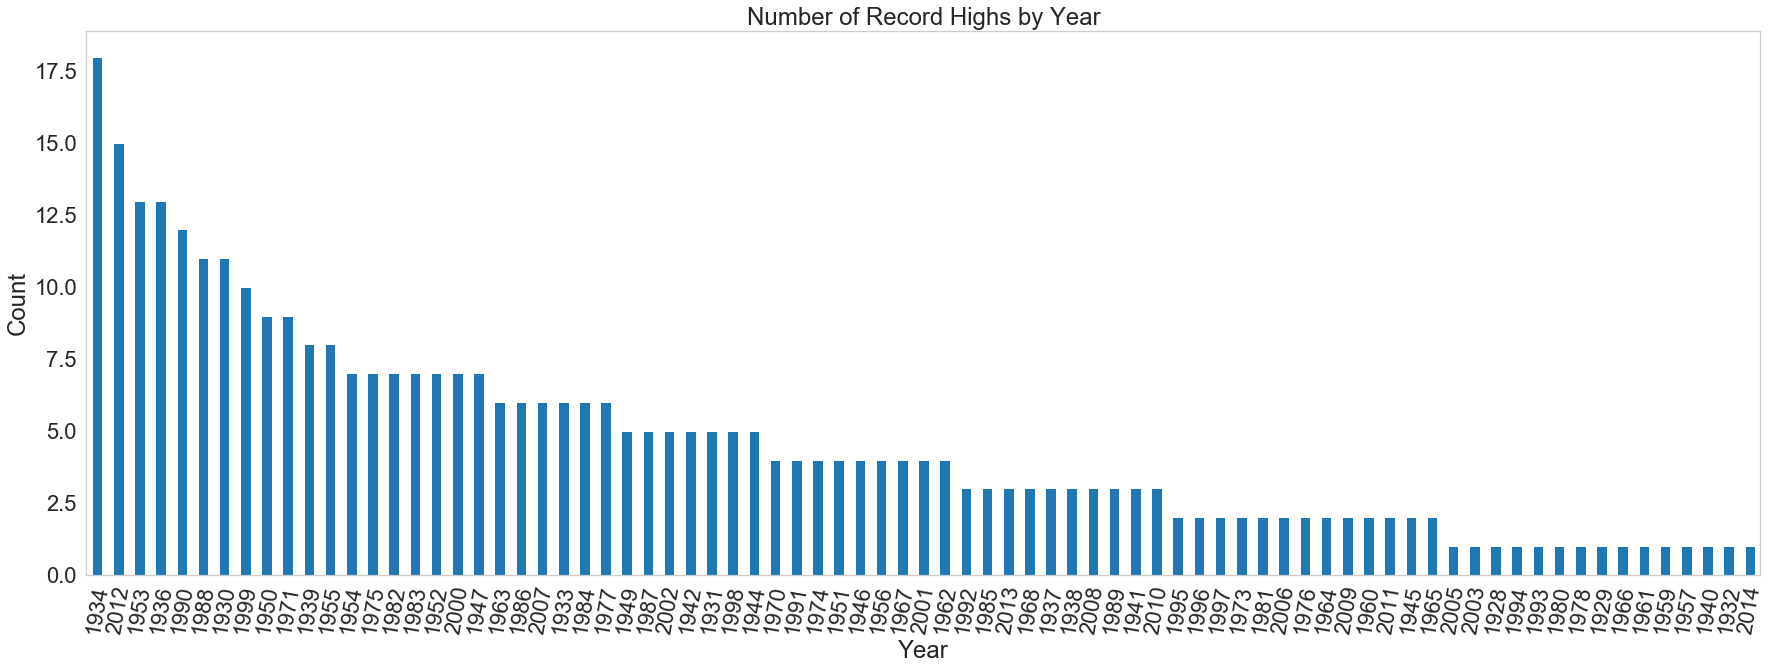

In [203]:
# Create sorted dataframe
hist_df = df.groupby(['record_max_temp_year']).count()
hist_df.reset_index(inplace = True)
hist_df = hist_df.sort_values("record_max_temp", ascending=False)
hist_df['record_max_temp_year'] = hist_df['record_max_temp_year'].astype(int)
hist_df.reset_index(inplace = True)

# create list of x labels
x_labs = list(hist_df["record_max_temp_year"].astype(str))

# Plot 
plt.figure(figsize=(30,10))
hist_df["record_max_temp"].plot.bar()
plt.xlabel("Year")
plt.ylabel("Count of Record Highs")
plt.title('Number of Record Highs by Year')
plt.xticks(range(79), x_labs, rotation=80, horizontalalignment="center")
plt.show()